<a href="https://colab.research.google.com/github/alifele/PCA_methods/blob/master/Home_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

#Generating the House price data
in this section i am going to generate a data set relating the "Price" of a home to the "Age" ,"Size","Room","Floor","Bathroom"

In [28]:
n = 100; #the number of samples
Age =  np.random.randint(10,120,size=100).reshape(100,1)
Floor = np.random.randint(1,4,size=100).reshape(100,1)
Room = np.random.randint(1,6,size=100).reshape(100,1)
Bath = np.random.randint(1,6,size=100).reshape(100,1)
Size = np.random.randint(1000,5000,size=100).reshape(100,1)


Price = (Age**0.25) * Floor * (Room**0.5) * Bath * Size + np.random.randint(20000,30000);
print('the min is {} and the max is {}'.format(np.max(Price),np.min(Price)))
data = np.hstack((Age,Floor,Room,Bath,Size,Price))


the min is 359457.72393152455 and the max is 33563.928099201716


#Ploting Data

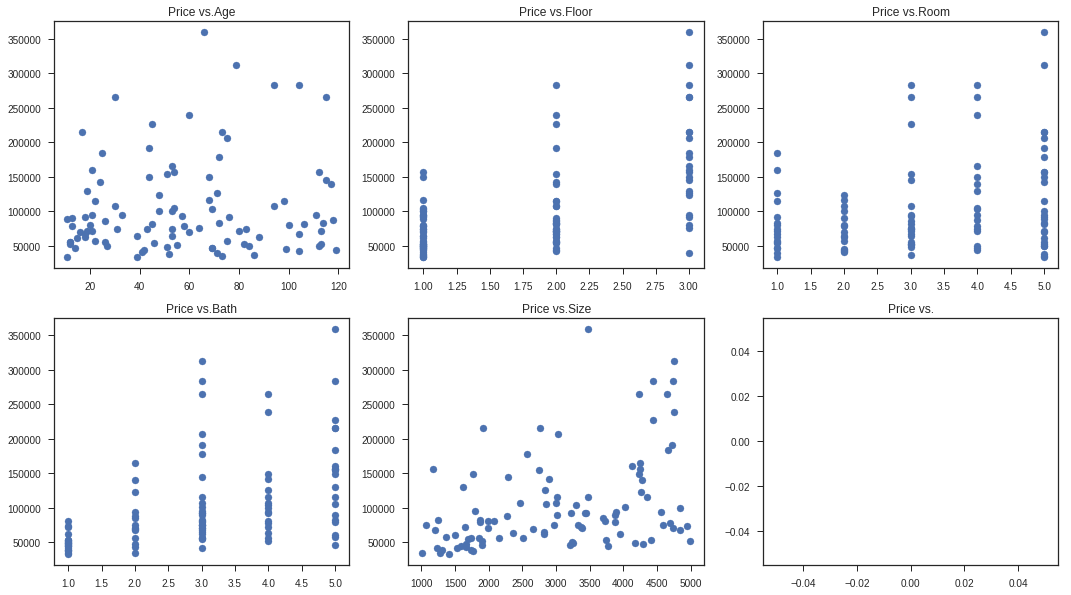

In [70]:
fig = plt.figure(figsize=(18,10))
axs = ['ax'+str(i) for i in range(1,8)]
labels = ["","Age","Floor","Room","Bath","Size",""]

for i in range(1,7):
  axs[i] = fig.add_subplot(2,3,i,title="Price vs."+labels[i])
  if (i==6):
    axs[i].plot([],[])
  else : 
    axs[i].scatter(data[:,i-1],data[:,5])
  
#ax = fig.add_subplot(1,1,1,xlabel='Age',ylabel='Price',title='Price vs. Age')
#ax.scatter(data[:,0],data[:,5])

#Scaling and Ploting Data



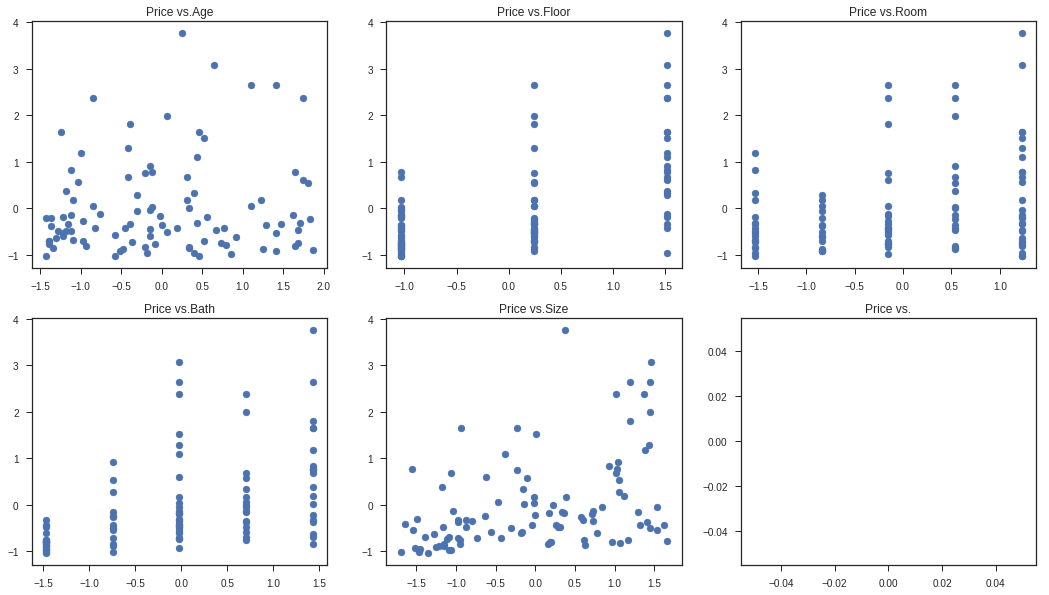

In [74]:
scaled_data = preprocessing.scale(data)
fig = plt.figure(figsize=(18,10))
axs = ['ax'+str(i) for i in range(1,8)]
labels = ["","Age","Floor","Room","Bath","Size",""]

for i in range(1,7):
  axs[i] = fig.add_subplot(2,3,i,title="Price vs."+labels[i])
  if (i==6):
    axs[i].plot([],[])
  else : 
    axs[i].scatter(scaled_data[:,i-1],scaled_data[:,5])
  

#Appling the PCA methods

<BarContainer object of 6 artists>

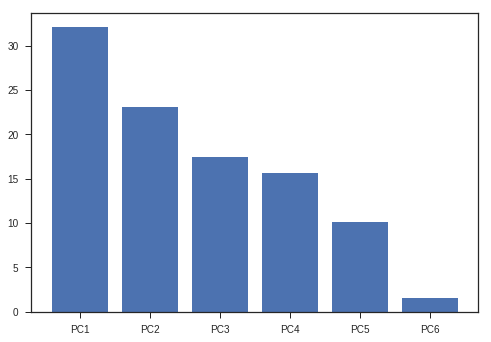

In [78]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)